## Observations and Insights

## Dependencies and starter code

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
comb_study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")



comb_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


# It would be reasonable here to remove duplicate records from Panda. There is at least one duplicate record - e.g. g989, which has differing results in later Timepoints. I did not remove the duplicate, although it would normally require additional inquiry and possible exclusion for analyses. It does impact statistical and analytical results, but is not likely to be material.

## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Generate statistics for Tumor Volume Grouped by Drug Regimen
regimen_mean=comb_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_med=comb_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_var=comb_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_std=comb_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_sem=comb_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


# Create list of Drug Regimens (and Sexes for later)
drug_list=comb_study_data["Drug Regimen"].unique()
sex_list=comb_study_data["Sex"].unique()

# Create a list of lists of statistical results (to be later converted into a panda)
drug_data=[]
for drug in drug_list:
    drug_data.append([drug,regimen_mean[drug],regimen_med[drug],regimen_var[drug],regimen_std[drug],regimen_sem[drug]])

# Convert list of lists into a panda with statistical results
drug_df=pd.DataFrame(drug_data, columns=['Drug','Mean','Median','Variance','Std Dev','SEM'])  

# Output table of summary statistics
drug_df

,Drug,Mean,Median,Variance,Std Dev,SEM
0,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
1,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
4,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
5,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
6,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
7,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
8,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
9,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots

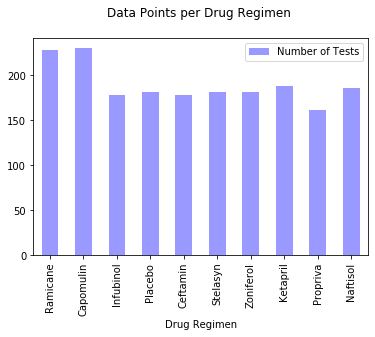

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# NOTE: I assume "data points" refers to the number measurements (i.e. mice/time point combinations)
# for each drug, not the actual number of data elements available for each drug regimen.
# "Data points" is not well-defined. In the real world I would ask for clarification on the meaning.


drug_index=pd.Series(comb_study_data["Drug Regimen"])
ax=drug_index.value_counts()
list_of_lists=[]
for drug in drug_list:
    list_of_lists.append([drug,ax[drug]])
count_df=pd.DataFrame(list_of_lists)
count_df.columns=["Drug Regimen","Number of Tests"]
count_df.plot.bar(x="Drug Regimen",y="Number of Tests", color='b', alpha=0.4, rot=90, title="Data Points per Drug Regimen \n")



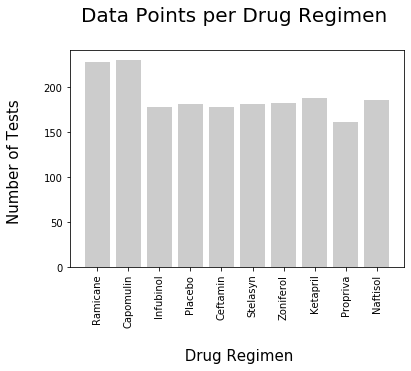

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis=[]
y_axis=[]
for drug in drug_list:
    x_axis.append(drug)
    y_axis.append(ax[drug])

plt.title("Data Points per Drug Regimen \n",size=20)
plt.ylabel("Number of Tests \n", size=15)
plt.xlabel("\n Drug Regimen", size = 15)
plt.xticks(rotation='vertical')

# Used light gray, the color of mice, for this graph
plt.bar(x_axis,y_axis,color='gray',alpha=0.4, align='center')  

plt.show()

# Note: These two do not look identical due to formatting, but reflect identical information.

## Pie plots

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas




# NOTE: The number of male and female mice varies depending on when in the experiment the measure is taken, so I used intial and final distributions.  Also the initial database has one female (g989) listed twice.  This is the difference in 125 vs 124 females.


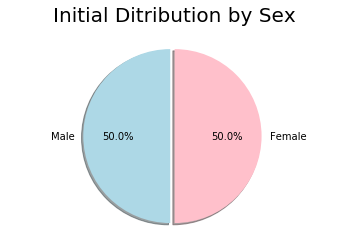

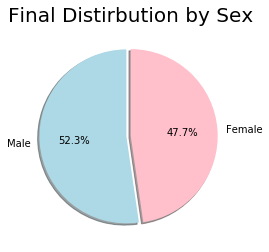

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get data for timepoints 0 and 45
initial_data=comb_study_data[comb_study_data["Timepoint"]==0]
final_data=comb_study_data[comb_study_data["Timepoint"]==45]
start_sex=initial_data["Sex"].value_counts()
end_sex=final_data["Sex"].value_counts()

# Basic Chart information
labels_chart="Male","Female"
colors_chart=["lightblue","pink"]
plt.axis('equal')
explode=(0.05,0)

# Final Distribution pie chart
plt.figure(0)
sizes=[end_sex["Male"],end_sex["Female"]]
plt.title("Final Distirbution by Sex",size=20)
plt.pie(sizes,explode=explode,shadow=True, labels=labels_chart,colors=colors_chart,startangle=90, autopct='%1.1f%%')

# Initial Distribution pie chart
plt.figure(1)
sizes=[start_sex["Male"],start_sex["Female"]]
plt.title("Initial Ditribution by Sex",size=20)
plt.pie(sizes,explode=explode, shadow=True, startangle=90, labels=labels_chart,colors=colors_chart,autopct='%1.1f%%')

# Show both charts
plt.show()

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Given four most promising regimens are: Capomulin, Ramicane, Infubinol, and Ceftamin

# limit the results to the final timepoint (Use final_data from above.)

# Set up regimens list for extracting the data for mice by regimen
regimens=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]




    

# Note: "Final" is not well-defined since some of the mice die before the end of the study. Final could refer to the last measurement for each mouse or only the measurements of each mouse still alive at the last timepoint in the experiment. I assume "final" refers to the latter in this assignment; however, this produces survivor bias. Mammals have a mass of approximately 1 mg per mm^3, the same as water. If a mouse dies, a way to modify the results to reflect the adversity of death ... at least adverse to the mouse, though many might disagree about a mouse's death being adverse ... is to assign the mouses last weight in grams as the final "volume" of the tumor. This would address the survivor bias. (I know I am over-thinking the exercise, but this is how I have to regularly address such analyses in my work. It is an art as well as a science.)

## Quartiles, outliers and boxplots


In [9]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Loop through each regimen, get data points, determine IQR and points outside IQR for each
# Also set up list of lists for plotting box and whisker plot
plot_list=[]
for drug in regimens:
    plot_points=final_data[final_data["Drug Regimen"]==drug]["Tumor Volume (mm3)"].to_list()
    low_end=np.median(plot_points)-st.iqr(plot_points)
    hi_end=np.median(plot_points)+st.iqr(plot_points)
    plot_list.append(plot_points)
    ol_list=[]
    for pt in plot_points:
           if (pt<low_end) or (pt>hi_end):
                ol_list.append(pt)
    # Print output
    print(f"\nFor {drug}, there are {len(plot_points)} point and there are {len(ol_list)} outliers.")
    if ((len(ol_list))>0):
        print(f"The outliers are : {ol_list}")


For Capomulin, there are 21 point and there are 4 outliers.
The outliers are : [23.34359787, 28.48403281, 28.43096411, 47.68596303]

For Ramicane, there are 20 point and there are 3 outliers.
The outliers are : [22.05012627, 45.22086888, 43.04754260000001]

For Infubinol, there are 9 point and there are 2 outliers.
The outliers are : [72.2267309, 60.91876652]

For Ceftamin, there are 13 point and there are 0 outliers.


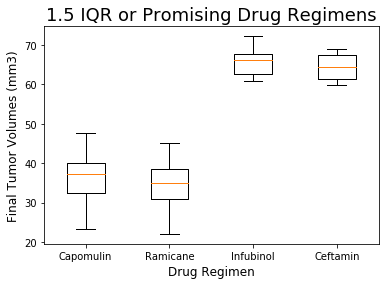

In [10]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Plot the box and whisker plot for this regimen
# Set up labels
regimens=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
fig1, ax1 = plt.subplots()
ax1.set_title('1.5 IQR or Promising Drug Regimens', size=18)
ax1.set_ylabel('Final Tumor Volumes (mm3)', size =12)
ax1.set_xlabel('Drug Regimen', size=12)

bp=plt.boxplot(plot_list, labels=regimens)
plt.show()


# I tried numerous approached to get the outliers to print. Nothing worked. Researching it on Stackflow showed others have a problem with this as well since there was a change in matplotlib.

## Line and scatter plots

In [11]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin 


# The instructions say "a mouse" rather than the average tumor volume of mice treated with Capomulin. I would think the aveage would be a better graph for analysis, but I am following the directions as they are written here.

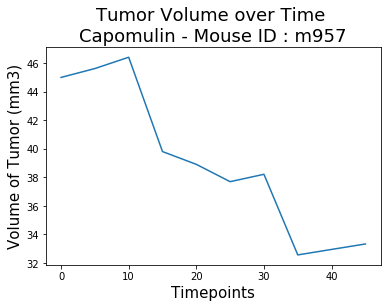

In [12]:
# Select a mouse treate with Capomulin and which survived to timepoint 45
# Get Mouse ID of mice treated with Capomulin from survivors at timepoint 45
final_mice=final_data[final_data["Drug Regimen"]=="Capomulin"]["Mouse ID"].to_list()

# Randomly select a mouse from the group
import random
rand_mouse=random.choice(final_mice)
rand_mouse

#Get data on final mouse
plot_info=comb_study_data[comb_study_data["Mouse ID"]==rand_mouse]

#Use timepoints for x-axis
plt.title(f"Tumor Volume over Time \nCapomulin - Mouse ID : {rand_mouse}", size=18)
plt.xlabel("Timepoints",size = 15)
plt.ylabel("Volume of Tumor (mm3)", size=15)
x_vals=plot_info["Timepoint"]
y_vals=plot_info["Tumor Volume (mm3)"]
plt.plot(x_vals,y_vals)




Text(0, 0.5, 'Avg. Tumor Volume (mm3)')

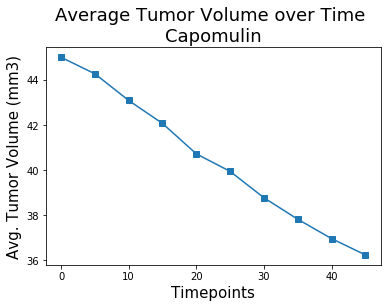

In [13]:
# Here is an alternative using the AVERAGE tumor volumes of surviving mice
fig = plt.figure()
ax=plt.axes()
time_points=np.arange(0, 50, 5)
y_val=[]
cap_study_data=comb_study_data[comb_study_data["Drug Regimen"]=="Capomulin"]
for t_p in time_points:
        y_val.append(cap_study_data[cap_study_data["Timepoint"]==t_p]["Tumor Volume (mm3)"].mean())
ax.plot(time_points,y_val,marker='s')
plt.title("Average Tumor Volume over Time \nCapomulin", size=18)
plt.xlabel("Timepoints", size=15)
plt.ylabel("Avg. Tumor Volume (mm3)", size=15)

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Since the initial tumor volume is the same for all mice in the sample, I assume this is the final tumor volume.

Text(0.5, 0, 'Mouse Weight (g)')

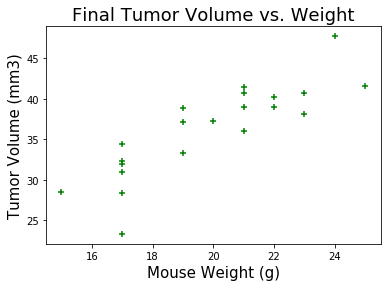

In [14]:
# Get x and y points
fin_dat=final_data[final_data["Drug Regimen"]=="Capomulin"]
x_points=fin_dat["Weight (g)"].to_list()
y_points=fin_dat["Tumor Volume (mm3)"].to_list()

# Produce scatter plot
plt.scatter(x_points,y_points,color='g',marker='+')
plt.title("Final Tumor Volume vs. Weight", size=18)
plt.ylabel("Tumor Volume (mm3)",size=15)
plt.xlabel("Mouse Weight (g)",size=15)


In [52]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x=x_points
y=y_points
std_x=np.std(x)
std_y=np.std(y)
avg_x=np.mean(x)
avg_y=np.mean(y)
corr_xy=np.corrcoef(x,y)[0,1]
slope=st.linregress(x,y).slope
intercept=st.linregress(x,y).intercept
line_form="Tumor Vol = ("+str(round(slope,2))+' x Wt) + '+str(round(intercept,2))
print(f"The Pearson correlation between weight and final tumor size is {corr_xy: 5.2f}.\nThe linear regression model is {line_form}.")

The Pearson correlation between weight and final tumor size is  0.85.
The linear regression model is Tumor Vol = (1.72 x Wt) + 2.0.


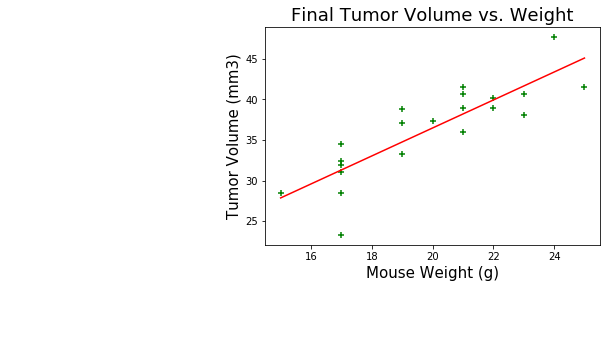

In [57]:
# Now for fun I'll plot the correlation line on the scatter plot

plt.title("Final Tumor Volume vs. Weight", size=18)
plt.ylabel("Tumor Volume (mm3)",size=15)
plt.xlabel("Mouse Weight (g)",size=15)
plt.scatter(x_points,y_points,color='g',marker='+')

# Add regression line

start=slope*np.min(x)+intercept
end=slope*np.max(x)+intercept
plt.plot([np.min(x),np.max(x)],[start,end],color='red')
plt.annotate(line_form,(6,10),fontsize=15,color='red')
plt.show()

# Again, I tried several ways to add the annotated equation, but it does not show up here.